<a href="https://colab.research.google.com/github/expactopatronas/Medical_CosAnalysis/blob/main/Medical_cost_%C4%B1nsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical Insurance Cots **



Öncelikli olarak gerekli kütüphaneler google colap'a indirmeliyiz.
Bu proje için aşağıdaki kütüphaneleri yüklememiz gerikiyor.


*   Numpy
*   Pandas
*   seaborn
* mathplotlib
*scikit_learn







Numpuy kütüphanesini indirelim.

In [79]:
#pip install numpy
#Daha önce indirmiştik.

Pandas Kütühanesini indirelim.

In [80]:
#pip install pandas
#Daha önceden indirmiştik

Seaborn kütüphanesini indirelim.

In [81]:
#pip install seaborn
#Daha önceden indirmiştik.

Scikit_learn kütüphanesini indirelim.

In [82]:
#pip install scikit-learn
#Daha öncden indirmiştim.

Matplotlip kütüphanesini  indirelim

In [83]:
#pip install matplotlib
#Daha önceden indirdik.


# **Kütüphaneleri Ortamımza Aktarma**

Kütüphaneleri ortama import fonksiyonu yardımıyla aktarıyoruz. Kütüphane isimlerini daha sonradan birçok kez kyullanacağımız için "as" diyerk kısaltma olarak tanımlıyoruz.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Kütüphanelrimizi import ettik. Artık çalışma alanımızda verdiğiğimiz kısaltmaları kullanarak kütüphanelere erişebileceğiz.

# **Veri Yükleme**

Verilerimizi daha önceden  Kaggle üzerinden indirip Coogle colap içine aktarıyoruz. İstersek Verinin URL sini kullanarakta Doğrudan Google Colap çalışma ortamımıza aktarabiriz.
 Dataset linki: https://www.kaggle.com/datasets/mirichoi0218/insurance



In [85]:
#Veri etimiz csv uzantılı bir veri olduğu için bu veriyidah kolay işlemek için  Pandas Dataframe olarak okumamız gerkir.
data = pd.read_csv("/content/drive/MyDrive/dataset/insurance.csv") #Verimizin bulunduğu konumu ekliyoruz.

İlk beş veriyi görelim.

In [86]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Son beş veriyi görelim.

In [87]:
data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Verilerimiz :age, sex, bmi,  children, smoker, region, charges olmak üzere 7 farklı özellik içeriyor.

Verimizin boyutunu görelim.

In [88]:
data.shape #(1338,7) 1338 satır 7 sütündan oluştuğunu gösterir.

(1338, 7)

In [89]:

data.info() # Veri hakında özet bilgi almamızı sağlar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verimizi incelediğimizde 0-6 arasında numaralandırımış 7 özelliğimiz bulnmakta .

*   Her özellikten1338 veri var
*   Veride hiç boş değer(non-null) yok.
* Age ve children verisi integer, bmi ve charges float, sex, smoker, ve region verisi ise object veri türünden.

Object türdeki veriler kategorik verilerimizdir.




**Verimizde boş değer  varmı yokmu kontrol edelim.**

In [90]:
data.isnull().all(axis=0) # Her bir sütundaki  boş veri varmı yokmu kontrol eder.
#data.isna()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [91]:
data.isnull().sum() #Her bir stündaki toplam boş veri sayısını gösterir.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Veri ile ilgili  bazı istatiksel bilgilere bakalım.**

Veri ile ilgili maksimum , minimum , ortalam , satandart sapma ve yüzdelik dilşmler hakkında bizi bilgilendirir.

In [92]:
data.describe()#Veri ile ilgili istatiksel bilgileri sağlar.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Sadece sayısal değerlere göre analizi görebiliyorz. SAyısal değerler olmayan özellikleri kategorik özellik olarak nitelendirilir.

Kategorik Özellikler
*   sex
*   smoker
*   region



# **Veri Görselleştirme**

Verilerimiz daha iyi anlamk  ve aralarındaki ilişkileri ortaya çıkarmak için verileri görselleştirelim.

**Matplotlib ile görselleştirme.**

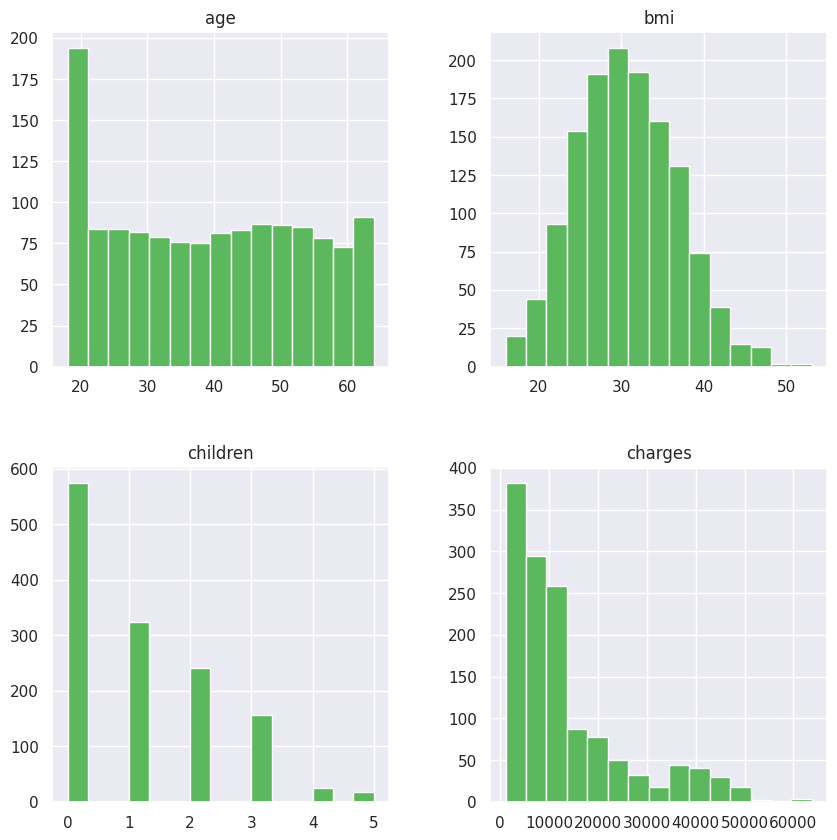

In [93]:
data.hist(bins=15,color='#5cb85c', figsize=(10,10)) #Histogram fonksiyonunu kullanarak verimizdeki her bir özelliğ görselleştirelim.

plt.show()

# Seaborn Kütüphanesi ile görselleştierlim

<ipython-input-94-5b7924a5699a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


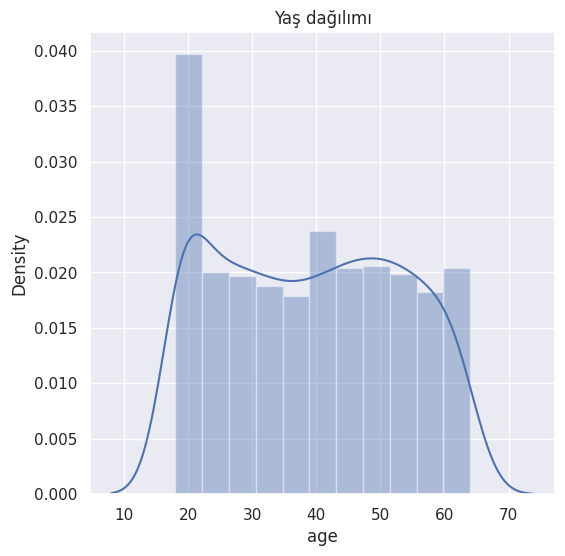

In [94]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["age"])
plt.title("Yaş dağılımı")
plt.show()

Cinsiyet Dağılımını görelim.

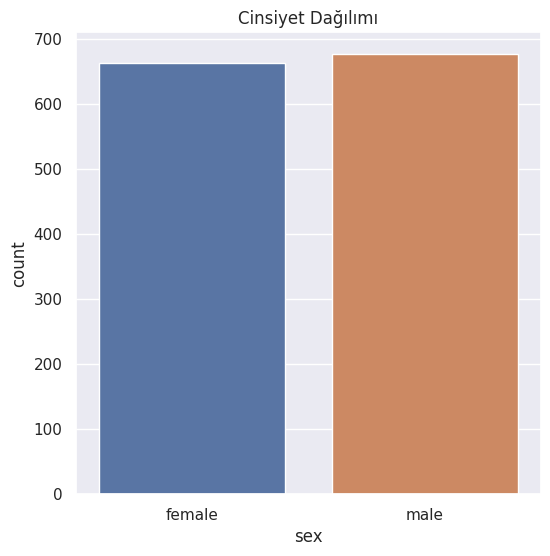

In [95]:
plt.figure(figsize=(6,6))
sns.countplot(x = "sex", data = data)
plt.title("Cinsiyet Dağılımı")
plt.show()

Cinsiyet sayısına bakalım.

In [96]:
data.value_counts("sex")

sex
male      676
female    662
dtype: int64

Vücut kütle indexi dağılımı

<ipython-input-97-00521c59679f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


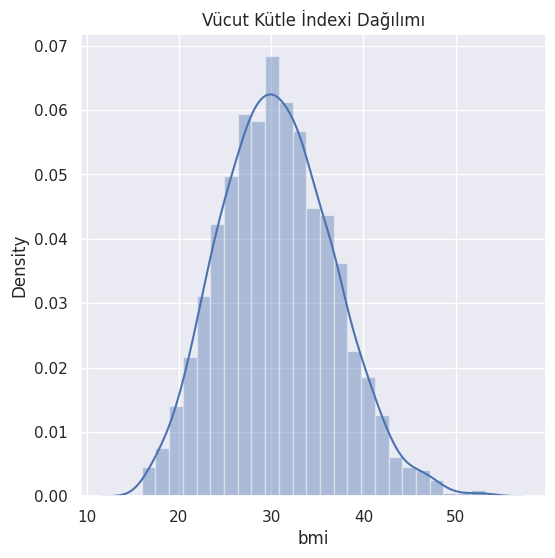

In [97]:
plt.figure(figsize=(6,6))
sns.distplot(data["bmi"])
plt.title("Vücut Kütle İndexi Dağılımı")
plt.show()

Çocuk sayısına görelim.

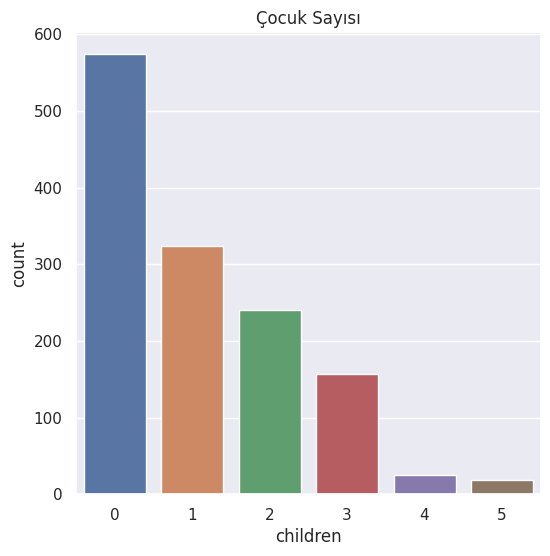

In [98]:
plt.figure(figsize=(6,6))
sns.countplot(x = "children", data = data)
plt.title("Çocuk Sayısı")
plt.show()

Net cocuk sayısı değerlerine bakalım.

In [99]:
data.value_counts("children")

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

Bölgelere göre veri setinin inceleyelim.

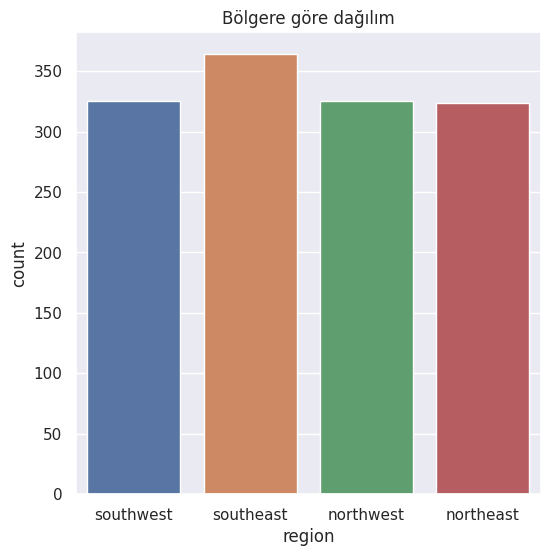

In [100]:
plt.figure(figsize=(6,6))
sns.countplot(x = "region", data = data)
plt.title("Bölgere göre dağılım")
plt.show()

Maaş dağılımına bakalım

<ipython-input-101-be4d3f82bf85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["charges"])


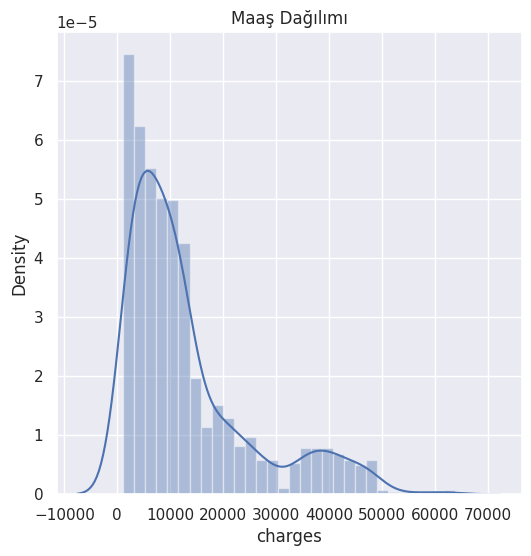

In [101]:
plt.figure(figsize=(6,6))
sns.distplot(data["charges"])
plt.title("Maaş Dağılımı")
plt.show()

# **Veri Ön İşleme**

Kategorik Özellikleri **sayısal** verilere dönüştürme.

In [102]:
data_copy = data.copy() # Yapacağımız işlemler orjinal veriyi bozmaması  için veri setimizi kopyaıyoruz.Kopyalanan veri seti üzerinden işlem yapılacaktır.

In [103]:

# Label Encoding and One-Hot Encoding
label_encoder = LabelEncoder()
data_copy["sex"] = label_encoder.fit_transform(data_copy["sex"])
data_copy["smoker"] = label_encoder.fit_transform(data_copy["smoker"])
data_copy["region"] = label_encoder.fit_transform(data_copy["region"])

Kategorik verilerimiz sayısal veriler olarak düzenlenmiş halini görelim.

In [104]:
data_copy.sample(10) #rasgele seçilen 10 veriyiyi gösterir.

,age,sex,bmi,children,smoker,region,charges
836,36,1,31.500,0,0,3,4402.23300
162,54,1,39.600,1,0,3,10450.55200
825,64,0,31.825,2,0,0,16069.08475
629,44,0,38.950,0,1,1,42983.45850
786,60,1,36.955,0,0,0,12741.16745
971,34,0,23.560,0,0,0,4992.37640
812,54,1,21.010,2,0,2,11013.71190
255,55,0,25.365,3,0,0,13047.33235
1297,28,0,26.510,2,0,2,4340.44090
96,54,0,30.800,3,0,3,12105.32000


**Veri setinde bağımli ve bağımsız değişkenleri belirleyelim.**

Bağımlı değişken


*   y = charges

Bağımsız değişkenler


*   x = age, sex, bmi, children, smoker, region






In [105]:
# X = bağımsız değişkenler
X = data_copy.drop("charges", axis=1)# veri setinden charges sütununu siler
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [107]:
# y = bağımsız değişken
y = data_copy["charges"] # veri setinde sadece charges stününunu alır.
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Baımsız değişkenler ile bağımsız değişken arasındaki ilişkileri göreslleştirek görelim.

<Axes: xlabel='region', ylabel='charges'>

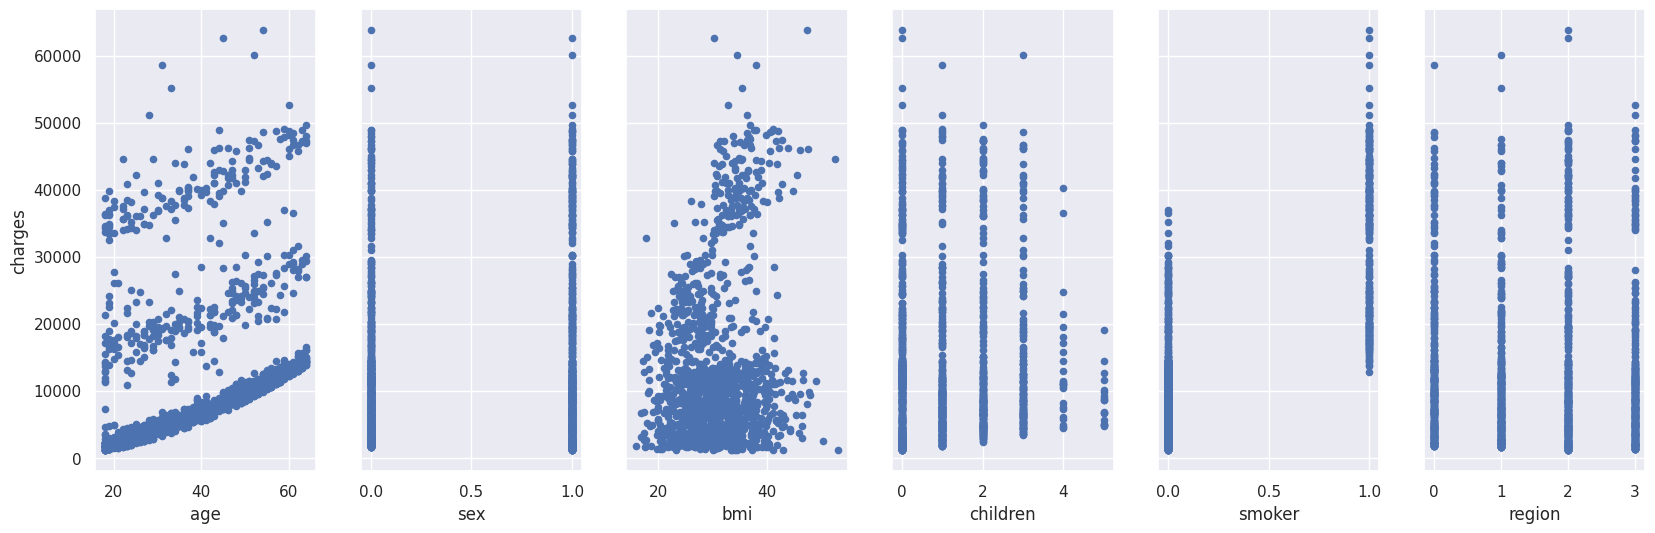

In [114]:
fig, axs = plt.subplots(1,6, sharey=True) # aynı y eksenine göre grafik çizilecek
data_copy.plot(kind="scatter", x = "age", y = "charges", ax = axs[0],figsize=(20,6))
data_copy.plot(kind="scatter", x = "sex", y = "charges", ax = axs[1],figsize=(20,6))
data_copy.plot(kind="scatter", x = "bmi", y = "charges", ax = axs[2],figsize=(20,6))
data_copy.plot(kind="scatter", x = "children", y = "charges", ax = axs[3],figsize=(20,6))
data_copy.plot(kind="scatter", x = "smoker", y = "charges", ax = axs[4],figsize=(20,6))
data_copy.plot(kind="scatter", x = "region", y = "charges", ax = axs[5],figsize=(20,6))

**Veri setinin eğitm ve test veri seti olarak ayırma**

veri setimizdeki bağımlı ve bağımsız değişkenler rasge olarak eğitm ve test veriine ayıralım.


*   Eğitim veri seti = Veriseti * 0.70 (veri setinin ½70 eğitm veri seti)
*   Test veri seti = verseti * 0.33 (verisetinin ½30 test veri seti)



In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Eğitim ve test veri setlerimizin boyutlarını görelim.

In [119]:
X_train.shape

(1070, 6)

In [120]:
X_test.shape

(268, 6)

In [121]:
y_train.shape

(1070,)

In [122]:
y_test.shape

(268,)

# Özellik Ölçeklendirme

Veri ölçeklendirme (scaling), makine öğrenimi modellerinin daha iyi performans göstermesini sağlamak için kullanılan bir ön işleme adımıdır. Özellikle regresyon ve uzaklık temelli algoritmalar gibi verinin büyüklüğüne ve ölçü birimlerine duyarlı olan modellerde önemlidir. İşte veri ölçeklendirmenin nedenlerine ve faydalarına bir bakış:

Model Stabilitesi: Veriyi ölçeklendirmek, modele giren özelliklerin ölçü birimlerinden bağımsız olarak daha istikrarlı ve karşılaştırılabilir hale gelmesini sağlar. Bu, modelin daha güvenilir sonuçlar üretmesine yardımcı olur.

Optimizasyon Süreci: Birçok model, eğitim sürecinde optimize edilirken kayıp fonksiyonları veya benzer metrikleri kullanır. Verinin ölçeklendirilmesi, optimize edilen parametrelerin daha hızlı ve etkili bir şekilde bulunmasını sağlar.

Hızlı Yakınsama: Gradient tabanlı algoritmalar, verinin ölçeğine duyarlıdır. Veriyi ölçeklendirerek, algoritmaların daha hızlı yakınsamasını sağlayabilirsiniz. Bu, eğitim süresini kısaltabilir.

Değişkenlerin Etkisi: Ölçeklenmemiş veri, büyük ölçekli değişkenlere göre daha küçük ölçekli değişkenlerin model üzerinde daha az etkili olmasına yol açabilir. Ölçeklendirme bu dengesizliği düzeltebilir.

Uzaklık Temelli Algoritmalar: Öklidyen mesafe veya benzeri uzaklık metrikleri, özellikler arasındaki ölçek farklılıkları nedeniyle bozulabilir. Ölçeklendirme bu tür algoritmaların daha doğru sonuçlar üretmesini sağlar.

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

In [129]:
X_test_scaled

array([[ 0.40114007, -1.0246016 , -0.89153925,  0.73433626, -0.50874702,
        -1.35325561],
       [-0.23863782, -1.0246016 , -0.08946143, -0.91119211, -0.50874702,
        -0.45611589],
       [ 1.75178229, -1.0246016 , -0.60845296, -0.91119211,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495,  0.97598911, -0.41972876, -0.08842793, -0.50874702,
        -1.35325561],
       [ 1.04091797, -1.0246016 ,  2.78941026, -0.91119211,  1.96561348,
         0.44102382],
       [ 0.82765867, -1.0246016 ,  0.60252728, -0.08842793, -0.50874702,
         1.33816354]])

# **Model Seçimi**

Veri setimize en uygun model için birkaç modeli birlikte test edelim

In [131]:
# Model seçimi
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
best_model = None
best_score = float("inf")

Çapraz doğrulama (cross validation), modelin performansını değerlendirmek ve aynı zamanda farklı modellerin performansını karşılaştırmak için kullanılan bir yöntemdir. Çapraz doğrulama, veriyi farklı parçalara böler, her bir parçada modeli eğitip geriye kalan parçada değerlendirir. Bu sayede daha güvenilir bir model performansı tahmini elde edilir.

En İyi Model Seçimi: Modellerin çapraz doğrulama sonuçları karşılaştırılır. Genellikle en düşük hata değerine sahip olan model, en iyi model olarak seçilir.



In [134]:
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    mean_rmse = np.mean(rmse_scores)
    print(f"{name} RMSE: {mean_rmse}")
    if mean_rmse < best_score:
        best_score = mean_rmse
        best_model = model

print("En iyi model:", best_model)

Linear Regression RMSE: 6137.623020674888
Decision Tree RMSE: 6552.830417415265
Random Forest RMSE: 4927.519438880597
En iyi model: RandomForestRegressor(random_state=42)


**Hyper Parametre Optimizasyonu.**

Hyperparametre optimizasyonu, makine öğrenimi algoritmalarının performansını artırmak için kullanılan model parametrelerini (hyperparametreler) ayarlama sürecidir. Hyperparametreler, modelin eğitim dışında belirli değerlerle yapılandırılan parametrelerdir. Bu parametreler, modelin genel davranışını etkiler ve modelin eğitim sürecinde optimize edilmezler.

Bir modelin performansını artırmak ve daha iyi sonuçlar elde etmek için doğru hyperparametre değerlerini bulmak önemlidir. Hyperparametre optimizasyonu, deneme-yanılma veya otomatik optimizasyon araçları kullanarak gerçekleştirilebilir. İşte bazı popüler hyperparametre optimizasyon yöntemleri:

Grid Search (Izgara Arama): Grid Search, **belirlenen hyperparametre değerlerinin her bir kombinasyonunu deneyerek en iyi sonucu bulmayı amaçlar. Tüm olası değer kombinasyonları üzerinde dener,** böylece en iyi kombinasyonu bulma garantisi vardır. Ancak bu yaklaşım çok sayıda hyperparametre ve değer kombinasyonlarıyla **zaman alabilir**.Modelimizde grid search hyperparametre optimizasyon yöntemini kullanacağız.

Randomized Search (Rastgele Arama): Randomized Search, **hyperparametre değerlerini belirli bir dağılım içinde rastgele seçerek denemeyi amaçlar**. Grid Search'a göre **daha hızlıdır** ve genellikle daha az deneme yapılmasına rağmen iyi sonuçlar elde edebilir.

Bayesian Optimization: Bu yöntem, denemeleri daha akıllıca seçmek için** olasılık modellerini kullanır**. Önceki denemelerden elde edilen bilgileri kullanarak, en olası iyi sonuçları verecek denemeleri seçmeye çalışır. Bu yöntem, **daha az denemeyle daha iyi sonuçlar** elde etmeye yardımcı olabilir.

Genetic Algorithms: Genetik algoritmalar, evrimsel süreçlere dayalı bir optimizasyon yaklaşımıdır. Bir populasyon içinde hyperparametre değerlerini temsil eden bireyler bulunur. Bu bireyler, çaprazlama ve mutasyon gibi işlemlerle evrilir. Popülasyondaki bireylerin performansı değerlendirilir ve en iyi sonuçları veren bireyler elde edilmeye çalışılır.

Hyperparametre optimizasyonu, modellerin daha iyi performans göstermesini ve daha iyi sonuçlar elde etmeyi sağlar. Bu sayede daha iyi genelleme yapabilen, daha istikrarlı ve güvenilir modeller elde edilebilir.







In [136]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print("Grid Search hyper paremetre optimizasyonundan sonra en iyi model :", best_model)

Grid Search hyper paremetre optimizasyonundan sonra en iyi model : RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)


# **Model** **Değerlendirme**

In [137]:
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 18945395.255636342
Mean Absolute Error: 2435.3205604503187
R-squared: 0.8779674714660052
